##### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
#from scipy.stats import randint 

##### Importing the dataset

In [2]:
iris_data=pd.read_csv('Iris.csv',index_col=0)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No missing values present in the dataset

In [5]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


From  the above table we can say Petal Length have the wide range compared to the other features .The min is 1 and the max is 6.9.Thus the petal length is varying a lot.Sepal width is least varying.

In [6]:
iris_data.pivot_table(index='Species',values=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])

,PetalLengthCm,PetalWidthCm,SepalLengthCm,SepalWidthCm
Species,,,,
Iris-setosa,1.464,0.244,5.006,3.418
Iris-versicolor,4.260,1.326,5.936,2.770
Iris-virginica,5.552,2.026,6.588,2.974


 From the pivot table we can conclude that :
 
 * Iris-Setosa petal width and length are much smaller compared to Iris-versicolor and Iris-virginica.
 * Sepal Length of Iris-versicolor is smaller and the rest  species are nearly same in average.
 * Sepal Width of Setosa is bigger than the rest ,Versicolor and Virginica have nearly same Sepal width in average.
 
 Thus we can say Iris-Setosa has some distinct features.

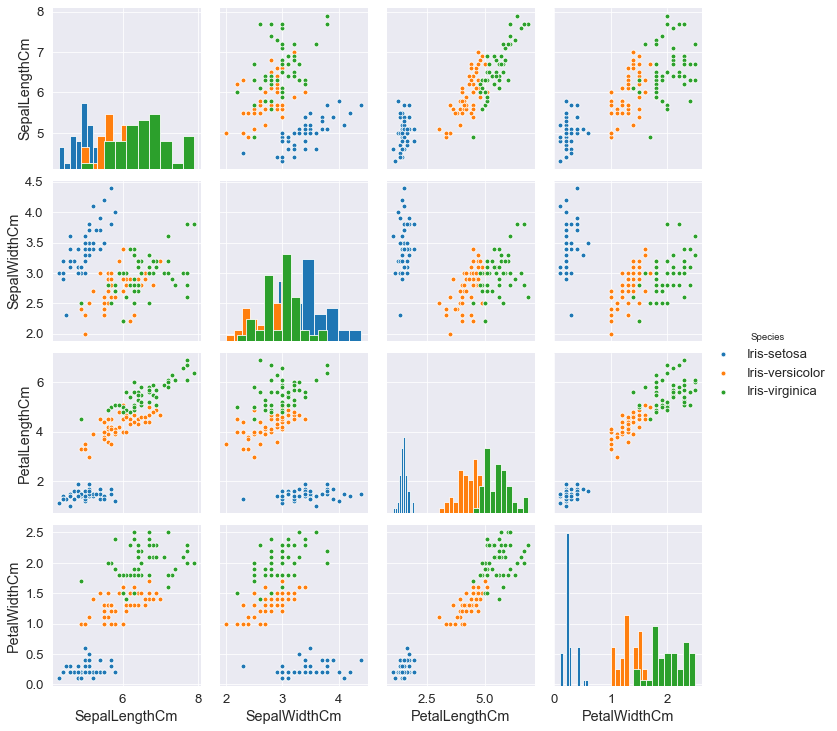

In [7]:
sns.set_context(context='paper',font_scale=1.5)
sns.set_style('darkgrid')
sns.pairplot(iris_data, hue='Species',diag_kind='hist')
plt.show()

From the above plot we can say that most of the features of a particular species are well distinct from  the other species.However Sepalength and SepalWidth of  Iris-versicolor and Iris-virginica are mixed together.

In [8]:
#Splititng the data into features columns and target columns
feat_data=iris_data.drop(['Species'],axis=1)
spec_data=iris_data['Species']

In [9]:
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(feat_data,spec_data,test_size=0.25,random_state=100)

In [10]:
#creating a object of Decision Tree Classifier
classifier=DecisionTreeClassifier()

**Instead of creating a classifier model with the default values,I will use the Grid Search CV  technique which will best values for the parameters of our model.**

In [11]:
#tuning three hyperparameters
parameters=[{'criterion':['gini','entropy'],'max_features':list(range(1,5)),'splitter':['best','random']}]

In [12]:
#creating  a object of GridSearchCV by passing the grid of parameters to be tuned.
gridcv=GridSearchCV(param_grid=parameters,estimator=classifier,cv=5,n_jobs=-1,verbose=1,scoring='accuracy')

In [13]:
#training the training dataset
gridcv.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    2.5s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': [1, 2, 3, 4],
                          'splitter': ['best', 'random']}],
             scoring='accuracy', verbose=1)

In [14]:
#printing the best parameters 
best_parameters=gridcv.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_features': 3, 'splitter': 'best'}


In [15]:
cv_result=gridcv.cv_results_
for mean_score,parameters in zip(cv_result['params'],cv_result['mean_test_score']):
    print(mean_score,parameters)

{'criterion': 'gini', 'max_features': 1, 'splitter': 'best'} 0.9015810276679842
{'criterion': 'gini', 'max_features': 1, 'splitter': 'random'} 0.9031620553359684
{'criterion': 'gini', 'max_features': 2, 'splitter': 'best'} 0.9561264822134387
{'criterion': 'gini', 'max_features': 2, 'splitter': 'random'} 0.9288537549407113
{'criterion': 'gini', 'max_features': 3, 'splitter': 'best'} 0.9735177865612649
{'criterion': 'gini', 'max_features': 3, 'splitter': 'random'} 0.9561264822134387
{'criterion': 'gini', 'max_features': 4, 'splitter': 'best'} 0.9735177865612649
{'criterion': 'gini', 'max_features': 4, 'splitter': 'random'} 0.9644268774703558
{'criterion': 'entropy', 'max_features': 1, 'splitter': 'best'} 0.9379446640316207
{'criterion': 'entropy', 'max_features': 1, 'splitter': 'random'} 0.9292490118577075
{'criterion': 'entropy', 'max_features': 2, 'splitter': 'best'} 0.9644268774703558
{'criterion': 'entropy', 'max_features': 2, 'splitter': 'random'} 0.9379446640316207
{'criterion': 'e

In [16]:
print(f"The best score of the model is {gridcv.best_score_} ")

The best score of the model is 0.9735177865612649 


In [17]:
best_classifier=gridcv.best_estimator_
y_pred=best_classifier.predict(X_test)

In [18]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(iris_data.columns[:4])
classes=iris_data['Species'].unique()

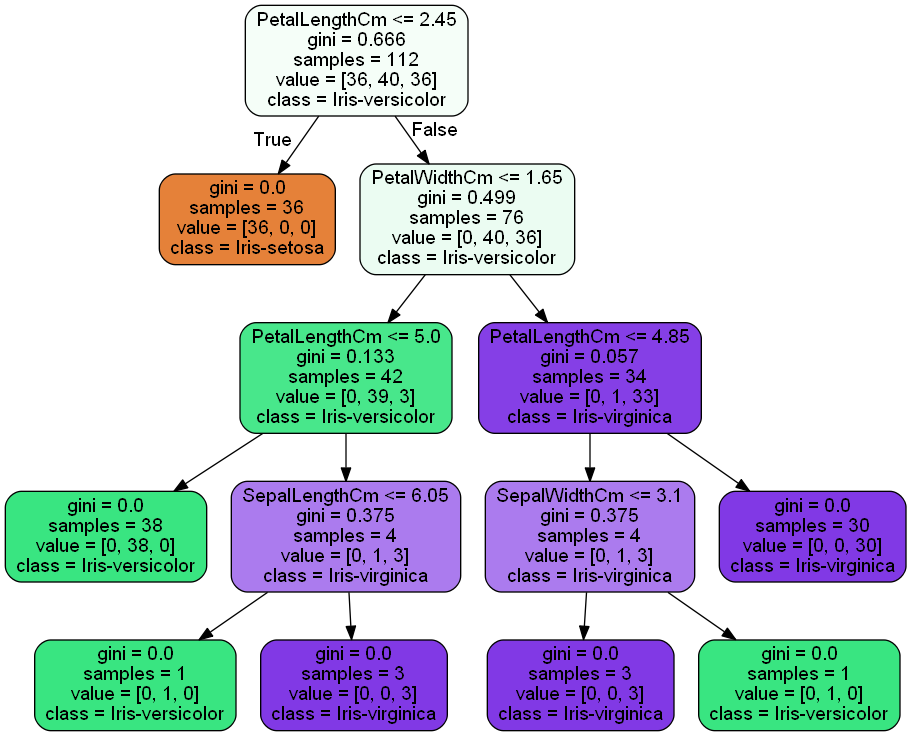

In [19]:
dot_data = StringIO()  
export_graphviz(best_classifier, out_file=dot_data,feature_names=features,class_names=classes,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

*Explanation*

* the first value indicates the column and the condition on which the root node was selected and further will be splitted
* the second value gives the gini impurity of the selected node
* samples gives the number of observations at that point of time present in the node
* value within the square brackets represents number of observations present in each class(output)

Then  the split was made on the basis of given condition.

    1.Here our first root node is of class Versicolor and the condition is Petallength<=2.45
    2.The gini index of the root node is 0.666 , The root node always have the highest gini index,It represent the impurity.
    3.In order to be the next node below root,the node should have gini less than its parent,otherwise it can't form a node.
    4.If gini is more then another condition is checked 
    5.The process is repeated till we reached a level where our gini can't be less or reached the maximum depth.

In [20]:
labels=iris_data['Species'].unique()
cm=confusion_matrix(y_test,y_pred,labels)

C:\Users\saiki\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


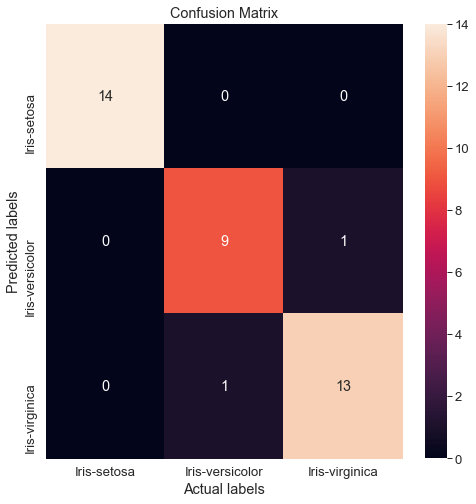

In [21]:
plt.figure(figsize=(8,8))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Actual labels');ax.set_ylabel('Predicted labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

* Iris-Setos:
    TP =14, FP=0,FN=0,TN=24(9+1+14)
    
* Iris-Versicolor:
    TP=9,FP=0,FN=1,TN=28(14+14)
 
* Iris-Virginica:
    TP=14,FP=0,FN=1,TN=23(14+9)

In [22]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.95        38
      macro avg       0.94      0.94      0.94        38
   weighted avg       0.95      0.95      0.95        38



In [23]:
print(f"The final accuracy score of the model on test data is :{round(accuracy_score(y_test,y_pred)*100,2)}%")

The final accuracy score of the model on test data is :94.74%
